# Deliverables

### Business Context

A food delivery company wants to predict delivery delay and understand what causes late deliveries, especially during peak hours.

### Notebook Tasks

*Perform EDA*

- Distribution of delays (delivery_time - estimated_time)
- Correlation analysis
- Outlier detection

*Feature engineering*

- Create delay_minutes
- Encode categorical variables

*Models*

- Linear Regression (baseline)
- Decision Tree Regressor
- Random Forest Regressor

*Evaluation*

- MAE, RMSE
- Residual analysis

### Report

1. Why linear regression underperforms
2. Which features most influence delay
3. Business recommendations (operational fixes)

# Dependencies Importing and Data Loading

In [1]:
import numpy as np # To perform linear algebra operations on data
import pandas as pd # To handle data as DataFrames
import matplotlib.pyplot as plt # To be used for data visualization
import seaborn as sns # To be used for data visualization
from scipy.stats import pointbiserialr # For correlation analysis of categorical variables.

# ML dependencies
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

In [2]:
delivery_data = pd.read_csv("food_delivery.csv") # Loading dataset which is provided as .csv format.

# Data Wrangling

In [3]:
delivery_data.head() # A first glance of the dataset.

,order_id,estimated_time_min,distance_km,order_hour,weather_condition,restaurant_rating,is_festival,delivery_time_min,actual_delay_flag
0,1000,31,11.6,15,Clear,4.6,0,49,1
1,1001,44,9.9,22,Clear,4.6,0,57,1
2,1002,39,4.4,16,Cloudy,3.5,0,50,1
3,1003,35,2.1,13,Clear,4.1,0,48,1
4,1004,32,8.5,11,Cloudy,4.4,0,45,1


### Data Assessment

*Objectives*

- Checking for Quality issues and Inconsistencies.
- Understanding features of data.
- Improvements and necessery actions to be taken on data.

In [4]:
delivery_data.info() # General information about datatypes, any null values and number of rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            50 non-null     int64  
 1   estimated_time_min  50 non-null     int64  
 2   distance_km         50 non-null     float64
 3   order_hour          50 non-null     int64  
 4   weather_condition   50 non-null     object 
 5   restaurant_rating   50 non-null     float64
 6   is_festival         50 non-null     int64  
 7   delivery_time_min   50 non-null     int64  
 8   actual_delay_flag   50 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 3.6+ KB


Based on the information above, we can conclude that:

- There are total of 50 rows. There is no null or missing values in dataset.
- Most features are integers and floats, ideal for modelling. *weather_condition* feature may need to be encoded later.

In [5]:
delivery_data.describe() # Understanding of basic statistics of features.

,order_id,estimated_time_min,distance_km,order_hour,restaurant_rating,is_festival,delivery_time_min,actual_delay_flag
count,50.00000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,1024.50000,38.180000,6.324000,15.900000,4.23200,0.200000,54.060000,0.940000
std,14.57738,7.520557,3.471961,4.106988,0.46749,0.404061,10.934704,0.239898
min,1000.00000,25.000000,1.100000,9.000000,3.40000,0.000000,31.000000,0.000000
25%,1012.25000,31.250000,3.200000,12.250000,3.80000,0.000000,46.500000,1.000000
50%,1024.50000,39.000000,6.100000,15.000000,4.30000,0.000000,53.500000,1.000000
75%,1036.75000,45.000000,9.500000,19.750000,4.60000,0.000000,61.750000,1.000000
max,1049.00000,49.000000,11.900000,22.000000,4.90000,1.000000,75.000000,1.000000


**Feature definitions**

- order_id: It is the unique ID provided to each order. Value of order id is between 1000 and 1049, total 50 orders.

- estimated_time_min: It is estimated time that the order will reach it's destination. A rough estimate, it's better to have margin around it to tackle the uncertainity.

- distance_km: Total distance between the order pickup location and order destination location. Maximum distance traveled for order is 11.9 km.

- order_hour: The time at which order is placed. Delivery starts at 9am and ends at 22pm.

- restaurant_rating: Overall rating of the restaurant. minimum rating is 3.4/5.0 and maximum is 4.9/5.0.

- is_festival: It is a categorical variable. 1 signifies that the order is placed at festival, 0 signifies that the order is placed at normal day.

- delivery_time_min: It tells how much time it actually took the order to reach it's destination.

- actual_delay_flag: It is an binary categorial(0 & 1) feature. It is obtained by strictly comparing *estimated_time_min* and *delivery_time_min*

Based on the information, we can conclude that:

- *actual_delay_flag* is an binary categorial(0 & 1) feature. It's mean of 0.94 means 94% of deliveries is flagged as late. Alarmingly high percentage. *actual_delay_flag* is obtained by strictly comparing *estimated_time_min* and *delivery_time_min*, because if it's the case then we are totally ignoring the real world uncertainties by not putting any margin.

In [6]:
delivery_data.head(10) # Printing first 10 rows of dataset.

,order_id,estimated_time_min,distance_km,order_hour,weather_condition,restaurant_rating,is_festival,delivery_time_min,actual_delay_flag
0,1000,31,11.6,15,Clear,4.6,0,49,1
1,1001,44,9.9,22,Clear,4.6,0,57,1
2,1002,39,4.4,16,Cloudy,3.5,0,50,1
3,1003,35,2.1,13,Clear,4.1,0,48,1
4,1004,32,8.5,11,Cloudy,4.4,0,45,1
5,1005,45,5.8,20,Rainy,4.7,0,56,1
6,1006,31,2.3,16,Clear,3.8,0,38,1
7,1007,43,6.4,14,Clear,3.6,0,48,1
8,1008,47,1.4,19,Clear,4.4,0,43,0
9,1009,35,11.0,11,Storm,4.6,0,74,1


The observed features reveal the following insights:

- *order_id* will just add noise to the model, because it is as number does not contribute to understanding the late delivery pattern. It is because as a number, *order_id* will not show any correlation with late delivery pattern. Better to be removed in data cleaning phase.

- *actual_delay_flag* needs *delivery_time_min* feature to be computed. But if we are doing modelling, we are trying to predict *delivery_time_min*. So, we can conclude that infact *actual_delay_flag* is causing data leakage. Better to be removed in data cleaning phase.

- *delivery_time_min* will also cause data leakage if used as a feature. Also using this as a target can also cause issues. Better to have a some kind of delay variable. Not removing *delivery_time_min* feature because it maybe useful in other phases of analysis before removak

### Data cleaning

*Objectives*

- Removing *order_id* feature because it is causing noise.
- Removing *actual_delay_flag* feature because it is causing data leakage.

In [7]:
delivery_data_v2 = delivery_data.drop(["order_id", "actual_delay_flag"], axis=1) # Droping order_id and actual_delay_flag features from dataframe.
delivery_data_v2.head() # Taking quick glance of dataset.

,estimated_time_min,distance_km,order_hour,weather_condition,restaurant_rating,is_festival,delivery_time_min
0,31,11.6,15,Clear,4.6,0,49
1,44,9.9,22,Clear,4.6,0,57
2,39,4.4,16,Cloudy,3.5,0,50
3,35,2.1,13,Clear,4.1,0,48
4,32,8.5,11,Cloudy,4.4,0,45


# Exploratory Data Analysis

*Objectives*

- Distribution of delays (delivery_time - estimated_time)
- Correlation analysis
- Outlier detection

### Understanding distribution of delays

Visualizing distribution of delays will help us seeing the dispersion, median delays, extreme delays (outliers)and hidden insights (such as skewness, type od distribution, etc) which will help us make concrete assumptions about the data in future steps. Best tool for visualization for these insights is box-plot.

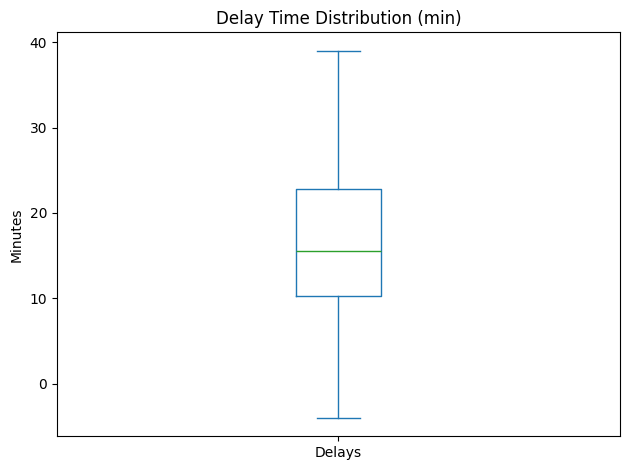

In [8]:
delays = pd.DataFrame()
delays["Delays"] = delivery_data_v2["delivery_time_min"] - delivery_data_v2["estimated_time_min"]

ax = delays["Delays"].plot.box()
ax.set_title("Delay Time Distribution (min)")
ax.set_ylabel("Minutes")

plt.tight_layout()
plt.show()

*From the box-plot, we can observe that:*

Median appears slightly below the center, which makes data slightly right skewed. The bars are also approximately equal in size. So, we can assume the distribution as normal distribution. But we need to test the assumption over skewness and kurtosis values because for such small number of rows (number of rows = 50), minor changes in moments can drastically impact the normality.

if (-0.5 < skewness < 0.5) and (-0.5 < kurtosis < 0.5), then we can safely assume that distribution of delays is normal.

In [9]:
skewness = delays["Delays"].skew()
kurtosis = delays["Delays"].kurt()

f"Skewness of distribution is: {skewness:.2f}. Kurtosis of distribution is: {kurtosis:.2f}"

'Skewness of distribution is: 0.23. Kurtosis of distribution is: 0.08'

- Skewness = 0.23
- Kurtosis = 0.08

These values are well within the range. So, we can safely assume now that the Delay distribution is normal.

Other thing we can observe from the box-plot is the absence of outliers. It means there is are no extreme delays (delay >> 40 minutes).

*From the normality assumption, we can say that:*

- Mean delay (16 minutes) is the most happened delay. Then delays gradually decrease when they become higher and lower.

Delay feature should be used as the target variable in modelling.

### Correlation analysis

Analysing the correlation between delay variable and other features will help us pick better features and reduce noice in modelling phase.

**Studying correlation between numerical values and delay_min variable**

In [10]:
delivery_data_v2["delay_minutes"] = delays["Delays"]
delivery_data_v3 = delivery_data_v2.drop(["delivery_time_min"], axis=1) # delivery time will not give any useful insights in presence of delay time.

numeric_features = ['estimated_time_min', 'distance_km', 'order_hour', 'restaurant_rating', 'delay_minutes']

delivery_data_v3[numeric_features].corr()

,estimated_time_min,distance_km,order_hour,restaurant_rating,delay_minutes
estimated_time_min,1.000000,-0.134759,-0.157983,0.246190,-0.194634
distance_km,-0.134759,1.000000,0.066580,-0.160921,0.678048
order_hour,-0.157983,0.066580,1.000000,0.048470,0.018969
restaurant_rating,0.246190,-0.160921,0.048470,1.000000,-0.077866
delay_minutes,-0.194634,0.678048,0.018969,-0.077866,1.000000


[]

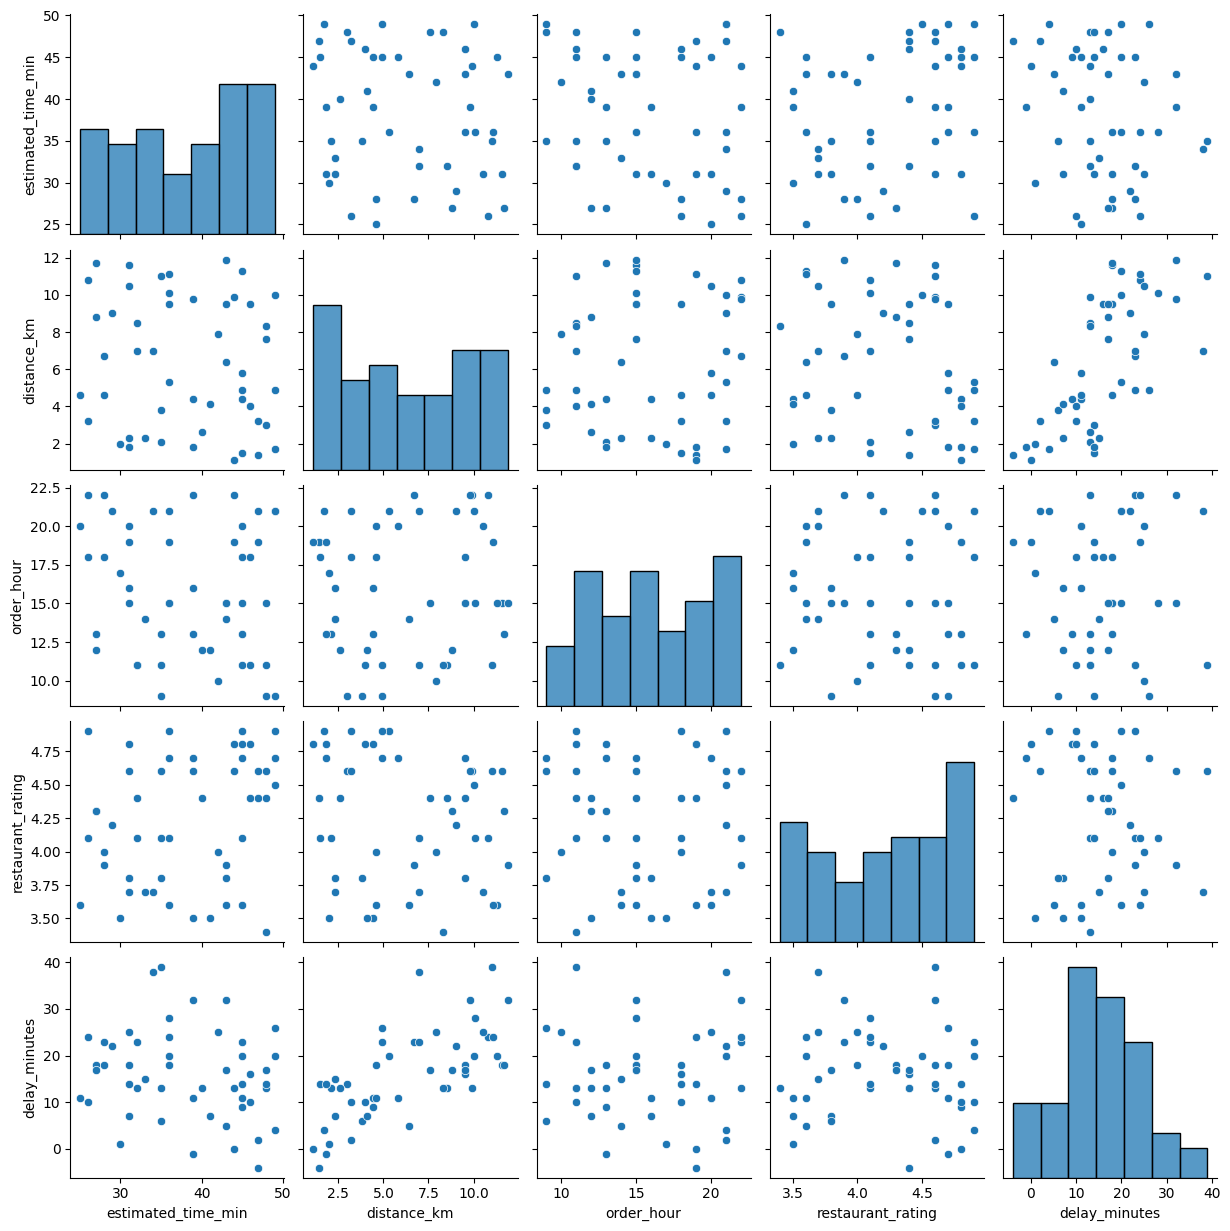

In [11]:
sns.pairplot(delivery_data_v3[numeric_features])
plt.plot()

*From the correlation matrix and pairplot, we can observe that:*

- *distance_km* have most correlation (~68%) with *delay_minutes*.

- Surprisingly *estimated_time_min* and *order_hour* does not show any strong correlation with *delay_minutes*. In case of *order_id*, it's maybe due to lack of enough data to identify correlation.

**Studying correlation between categorical values and delay_minutes variable**

- *is_festival* is a binary categorical variable. For this type of problem Point-biserial correlation is considered best correlation measure.
- *weather_condition* is a ternary categorical variable. Linear regression + R2 test is most suited for this tast.

In [12]:
categorical_features = ["weather_condition", "is_festival"]

r, p_value = pointbiserialr(delivery_data_v3[categorical_features[1]], delivery_data_v3["delay_minutes"])
f"Correlation coefficient is: {r:.2f}"

'Correlation coefficient is: 0.33'

*is_festival* have excellent correlation with *delay_minutes*.

In [13]:
tester = LinearRegression()

X = pd.get_dummies(delivery_data_v3[categorical_features[0]])
y = delivery_data_v3["delay_minutes"]

tester.fit(X, y)
y_pred = tester.predict(X)
score = r2_score(y_true=y, y_pred=y_pred)

f"Score is: {score:.2f}"

'Score is: 0.27'

0.27 r2 score means 27% of the variance is explained by the feature which is quite good in real world messy scenarios like this one.

*From the correlation analysis, we arrive at the conclusion that:*

- *distance_km* have most correlation (~68%) with *delay_minutes*.
- *is_festival* have 0.33 point biserial coefficient. Which is great.
- 27% of the variance of *delay_minutes* can be explained by *weather_condition*

These 3 features are perfect indicators to estimate delay times.

### Outlier detection

Using IQR is the best way to detect any outliers in numerical data.

Typical formula for IQR:
- Elements above (75th %ile) + (IQR * 1.5) will be considered outliers.
- Elements below (25th %ile) - (IQR * 1.5) will be considered outliers.

Below function takes DataFrame, calculate the Thresholds for both sides of each feature of DataFrame. If any value in feature exceeds the threshold then that feature will be appended in list. At the end function will return a list of feature names.

In [14]:
def outlier_detector(df):
    ls = list()
    keys = ['estimated_time_min', 'distance_km', 'order_hour', 'restaurant_rating', 'delay_minutes']
    for i in list(keys):

        IQR = df[i].quantile(.75) - df[i].quantile(.25)
        threshold1 = df[i].quantile(.75) + (IQR * 1.5)
        threshold2 =  df[i].quantile(.25) - (IQR * 1.5)

        if ((df[i] > threshold1) | (df[i] < threshold2)).any():
            ls.append(i)

    return ls

outliers_list = outlier_detector(delivery_data_v3)
outliers_list

[]

Empty list! It means no outliers are present in any numerical feature. Good news.

In [15]:
categorical_features = ["weather_condition", "is_festival"]

display(delivery_data_v3[categorical_features[0]].value_counts())
display(delivery_data_v3[categorical_features[1]].value_counts())

weather_condition
Clear     26
Cloudy    17
Storm      4
Rainy      3
Name: count, dtype: int64

is_festival
0    40
1    10
Name: count, dtype: int64

In categorical data, there is also no extreme value or any missclassification. 

Results of outlier analysis are - No outliers!!!

# Feature Engineering

*Objectives*

- Create delay_minutes
- Encode categorical variables

*delay_minutes* is already created and added.

*weather_condition* needs one hot encoding. One hot encoding because it have 4 categories.

In [16]:
weather = pd.get_dummies(delivery_data_v3["weather_condition"], dtype='int32') # Creating dummy variables.
delivery_data_v4 = delivery_data_v3.drop(["weather_condition"], axis=1) # Creating new version of dataset with normal weather conditions dropped.
delivery_data_v4[['Clear', 'Cloudy', 'Rainy', 'Stormy']] = weather # Adding dummy variables to the newer version of dataset.
delivery_data_v4.head(5) # getting glance of final dataset.

,estimated_time_min,distance_km,order_hour,restaurant_rating,is_festival,delay_minutes,Clear,Cloudy,Rainy,Stormy
0,31,11.6,15,4.6,0,18,1,0,0,0
1,44,9.9,22,4.6,0,13,1,0,0,0
2,39,4.4,16,3.5,0,11,0,1,0,0
3,35,2.1,13,4.1,0,13,1,0,0,0
4,32,8.5,11,4.4,0,13,0,1,0,0


# Modelling

Before modelling, we need to do some preprocessing on the dataset.

**Data Preprocessing Objectives:**

- Selecting important features and creating target variables.
- Creating train test splits.

From the conclusion of Exploratory Data Analysis, the important features for modelling are distance_km, is_festivals, weather_condition

In [17]:
X = delivery_data_v4[['distance_km', 'is_festival', 'Clear', 'Cloudy', 'Rainy', 'Stormy']] # creating features dataset.
y = delivery_data_v4['delay_minutes'] # creating target variable dataset.

To create splits we will use train test split. 80% of data will be used for training (40 rows) and 20% of data will be used for testing (20 rows)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Data Modelling Objectives:**

Train following models:

- Linear Regression (baseline)
- Decision Tree Regressor
- Random Forest Regressor

In [19]:
# Linear regression (baseline)
linear_regressor = LinearRegression()
linear_regressor.fit(X=X_train, y=y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
# Decision tree regressor
decision_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
decision_tree.fit(X=X_train, y=y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [21]:
# Random forest regressor
random_forest = RandomForestRegressor(max_depth=4, random_state=42)
random_forest.fit(X=X_train, y = y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Evaluation

*Objectives*

- MAE, RMSE
- Residual analysis

Evaluating models on metrics is very important for check how accurate they are. Using Mean Absolute Error (MAE) and Root Mean Squared error (RMSE). 

Why using 2 metrics?
Both metrics are telling a different stories. MAE is basically telling on average how well the model is behaving. It is robust to outliers and represents average trend in errors. One the other hand, RMSE is computed by squaring the differences, due to which it penalise large errors more. Due to it's high sensitivity towards outliers, it's great to detect rare but extreme errors.
Together they give more insights than they give individually:

- If MAE ~ RMSE, Then we can say errors are fairly disributes with no extreme residuals, hence no significant catastropic faliures.
- If RMSE >> MAE, Then we can say errors are not fairly distributed and there exist some extreme events (catastropic prediction errors).

In [22]:
y_pred_LR = linear_regressor.predict(X=X_test)
y_pred_DTR = decision_tree.predict(X=X_test)
y_pred_RFR = random_forest.predict(X=X_test)

print(f"MAE of linear regression: {mean_absolute_error(y_pred=y_pred_LR, y_true=y_test):.2f}")
print(f"RMSE of linear regression: {root_mean_squared_error(y_pred=y_pred_LR, y_true=y_test):.2f}\n")

print(f"MAE of decision tree regression: {mean_absolute_error(y_pred=y_pred_DTR, y_true=y_test):.2f}")
print(f"RMSE of decision tree regression: {root_mean_squared_error(y_pred=y_pred_DTR, y_true=y_test):.2f}\n")

print(f"MAE of random forest regression: {mean_absolute_error(y_pred=y_pred_RFR, y_true=y_test):.2f}")
print(f"RMSE of random forest regression: {root_mean_squared_error(y_pred=y_pred_RFR, y_true=y_test):.2f}")

MAE of linear regression: 3.80
RMSE of linear regression: 4.54

MAE of decision tree regression: 5.06
RMSE of decision tree regression: 6.36

MAE of random forest regression: 5.78
RMSE of random forest regression: 6.66


From the values of metrics, we can conclude that:

- Linear regression have lowest MAE and RMSE, but largest difference (0.99 ~ 1). Then comes Decision tree, after that Random forest. We can see the clear trend that with increase in complexity of the model, the overfitting is increasing.

### Residual Analysis

Analyzing residuals and their distribution helps assess whether the model has captured the underlying structure in the data. A strong diagonal pattern in predicted vs actual plots indicates learning, while randomness there suggests poor learning. Randomness is desirable in residual plots, whereas memorization is detected by a gap between training and test performance.

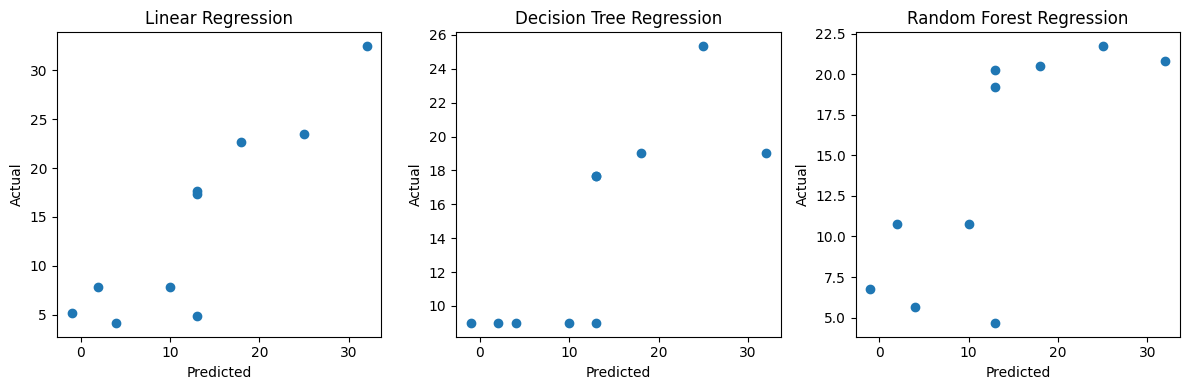

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].scatter(x=y_test, y = y_pred_LR)
ax[0].set_title("Linear Regression")
ax[0].set_ylabel("Actual")
ax[0].set_xlabel("Predicted")

ax[1].scatter(x=y_test, y = y_pred_DTR)
ax[1].set_title("Decision Tree Regression")
ax[1].set_ylabel("Actual")
ax[1].set_xlabel("Predicted")

ax[2].scatter(x=y_test, y = y_pred_RFR)
ax[2].set_title("Random Forest Regression")
ax[2].set_ylabel("Actual")
ax[2].set_xlabel("Predicted")

plt.tight_layout()
plt.show()

From the graphs we can observe that the linear regression showing the more strong pattern than all of 3. It indicates that linear regression learned most patterns and lesser memorization of training data. Other models likely overfitted the training data.
However, food delays is an real-world messy scenario with many factors affecting directly or indirectly. To model these kinds of scenario, i believe we don't have sufficient data.

# Report

*Questions*

1. Why linear regression underperforms
2. Which features most influence delay
3. Business recommendations (operational fixes)

Talking about linear regression, it didn't underperformed at all. It showed least MAE and RMSE score, although the difference between RMSE and MAE is greater than all models. It indicates that the model predicted most delays, but in some cases it failed, and that difference between actual delay and predicted delay was too much. It is difficult to prove and disprove the success or faliure of linear regression due to lack of sufficient data, because food delivery delay depends on so many factors (such as traffic, vehicle speed). Modelling this scenario with baseline linear regression may cause underfitting in production.

The features which influenced delay the most are:

- distance_km
- is_festival
- weather_condition

The business recommendations after conducting this data analysis are:

- To gather more variety as well as volume of data, so the predictions can become more accurate and models can be reliably used on production.
- Actual delay time should be used other than actual_delay_flag to make data more intuitive.
- If the data is collected as recommended, the machine learning can be actually deployed in production to estimate better estimated_time_min which can increase customer satisfaction because food is being actually delivered around the estimated time.

----- END OF ANALYSIS ----